# **Importing Libraries**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor
import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import RandomOverSampler
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import cross_val_score
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import RFE
from sklearn.feature_selection import SelectFromModel
from sklearn.linear_model import LassoCV
from sklearn.decomposition import PCA
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import precision_score, recall_score, confusion_matrix

# **Loading Data**

In [ ]:
# Load the CSV file into a DataFrame
df = pd.read_csv("heart_attack_prediction_dataset.csv")

df

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


# **Data Preprocessing**

**Handling Missing Values**

In [ ]:
missing_values_sum = df.isnull().sum()

In [ ]:
missing_values_sum

Patient ID                         0
Age                                0
Sex                                0
Cholesterol                        0
Blood Pressure                     0
Heart Rate                         0
Diabetes                           0
Family History                     0
Smoking                            0
Obesity                            0
Alcohol Consumption                0
Exercise Hours Per Week            0
Diet                               0
Previous Heart Problems            0
Medication Use                     0
Stress Level                       0
Sedentary Hours Per Day            0
Income                             0
BMI                                0
Triglycerides                      0
Physical Activity Days Per Week    0
Sleep Hours Per Day                0
Country                            0
Continent                          0
Hemisphere                         0
Heart Attack Risk                  0
dtype: int64

**Encoding Categorical Variables**

In [ ]:
# One-hot encoding for categorical variables
df_encoded = pd.get_dummies(df, columns=['Sex', 'Country', 'Continent', 'Hemisphere', 'Diet'])

In [ ]:
df_encoded

,Patient ID,Age,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,...,Continent_Asia,Continent_Australia,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy
0,BMW7812,67,208,158/88,72,0,0,1,0,0,...,False,False,False,False,True,False,True,True,False,False
1,CZE1114,21,389,165/93,98,1,1,1,1,1,...,False,False,False,True,False,True,False,False,False,True
2,BNI9906,21,324,174/99,72,1,0,0,0,0,...,False,False,True,False,False,True,False,False,True,False
3,JLN3497,84,383,163/100,73,1,1,1,0,1,...,False,False,False,True,False,True,False,True,False,False
4,GFO8847,66,318,91/88,93,1,1,1,1,0,...,True,False,False,False,False,True,False,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,121,94/76,61,1,1,1,0,1,...,True,False,False,False,False,True,False,False,True,False
8759,QSV6764,28,120,157/102,73,1,0,0,1,0,...,False,False,False,True,False,True,False,False,True,False
8760,XKA5925,47,250,161/75,105,0,1,1,1,1,...,False,False,False,False,True,False,True,True,False,False
8761,EPE6801,36,178,119/67,60,1,0,1,0,0,...,False,False,False,False,True,False,True,False,False,True


In [ ]:
print(df_encoded.dtypes)

Patient ID                          object
Age                                  int64
Cholesterol                          int64
Blood Pressure                      object
Heart Rate                           int64
Diabetes                             int64
Family History                       int64
Smoking                              int64
Obesity                              int64
Alcohol Consumption                  int64
Exercise Hours Per Week            float64
Previous Heart Problems              int64
Medication Use                       int64
Stress Level                         int64
Sedentary Hours Per Day            float64
Income                               int64
BMI                                float64
Triglycerides                        int64
Physical Activity Days Per Week      int64
Sleep Hours Per Day                  int64
Heart Attack Risk                    int64
Sex_Female                            bool
Sex_Male                              bool
Country_Arg

In [ ]:
# Split 'Blood Pressure' into systolic and diastolic columns
df_encoded[['Systolic Pressure', 'Diastolic Pressure']] = df_encoded['Blood Pressure'].str.split('/', expand=True)

# Convert extracted numerical values to integers
df_encoded['Systolic Pressure'] = pd.to_numeric(df_encoded['Systolic Pressure'], errors='coerce')
df_encoded['Diastolic Pressure'] = pd.to_numeric(df_encoded['Diastolic Pressure'], errors='coerce')

# Drop original 'Blood Pressure' column if not needed anymore
df_encoded.drop('Blood Pressure', axis=1, inplace=True)

# Print the updated DataFrame
df_encoded.head()

,Patient ID,Age,Cholesterol,Heart Rate,Diabetes,Family History,Smoking,Obesity,Alcohol Consumption,Exercise Hours Per Week,...,Continent_Europe,Continent_North America,Continent_South America,Hemisphere_Northern Hemisphere,Hemisphere_Southern Hemisphere,Diet_Average,Diet_Healthy,Diet_Unhealthy,Systolic Pressure,Diastolic Pressure
0,BMW7812,67,208,72,0,0,1,0,0,4.168189,...,False,False,True,False,True,True,False,False,158,88
1,CZE1114,21,389,98,1,1,1,1,1,1.813242,...,False,True,False,True,False,False,False,True,165,93
2,BNI9906,21,324,72,1,0,0,0,0,2.078353,...,True,False,False,True,False,False,True,False,174,99
3,JLN3497,84,383,73,1,1,1,0,1,9.828130,...,False,True,False,True,False,True,False,False,163,100
4,GFO8847,66,318,93,1,1,1,1,0,5.804299,...,False,False,False,True,False,False,False,True,91,88


**Standardization**

In [ ]:
# Convert 'Sex' to numerical
df['Sex'] = df['Sex'].map({'Male': 1, 'Female': 0})

In [ ]:
# Separate features and target variable
X = df_encoded.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
y = df_encoded['Heart Attack Risk']

# Standardize features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convert back to DataFrame
X_scaled = pd.DataFrame(X_scaled, columns=X.columns)


**Multicollinearity**

In [ ]:
# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data["feature"] = X_scaled.columns
vif_data["VIF"] = [variance_inflation_factor(X_scaled.values, i) for i in range(len(X_scaled.columns))]

# Display features with high VIF
print(vif_data[vif_data['VIF'] > 10])


/usr/local/lib/python3.10/dist-packages/statsmodels/stats/outliers_influence.py:197: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)


                           feature  VIF
18                      Sex_Female  inf
19                        Sex_Male  inf
20               Country_Argentina  inf
21               Country_Australia  inf
22                  Country_Brazil  inf
23                  Country_Canada  inf
24                   Country_China  inf
25                Country_Colombia  inf
26                  Country_France  inf
27                 Country_Germany  inf
28                   Country_India  inf
29                   Country_Italy  inf
30                   Country_Japan  inf
31             Country_New Zealand  inf
32                 Country_Nigeria  inf
33            Country_South Africa  inf
34             Country_South Korea  inf
35                   Country_Spain  inf
36                Country_Thailand  inf
37          Country_United Kingdom  inf
38           Country_United States  inf
39                 Country_Vietnam  inf
40                Continent_Africa  inf
41                  Continent_Asia  inf


# **Data Visualization**

**Scatter Plot**

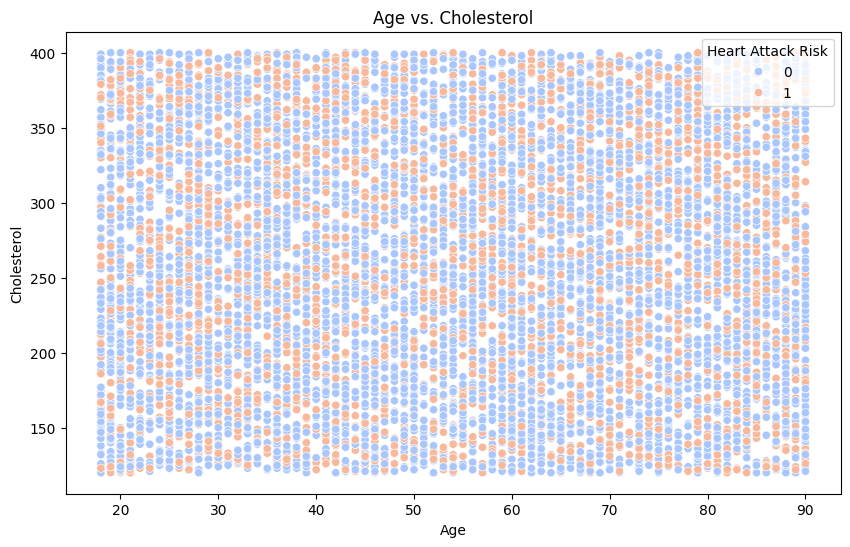

In [ ]:
# Scatter plot: Age vs. Cholesterol
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Age', y='Cholesterol', data=df, hue='Heart Attack Risk', palette='coolwarm')
plt.title('Age vs. Cholesterol')
plt.xlabel('Age')
plt.ylabel('Cholesterol')
plt.legend(title='Heart Attack Risk', loc='upper right')
plt.show()

This scatter plot shows the relationship between age and cholesterol levels. From the plot, it appears that there is no clear linear relationship between age and cholesterol.

**Bar Plot**

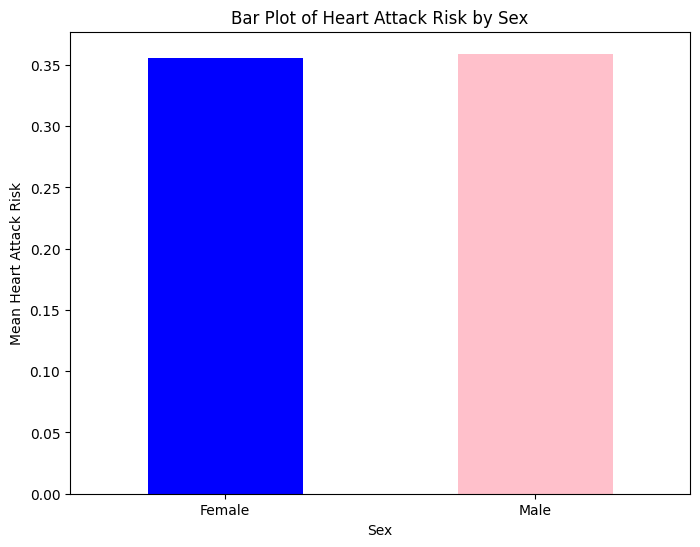

In [ ]:
# Bar plot of Heart Attack Risk by Sex
plt.figure(figsize=(8, 6))
df.groupby('Sex')['Heart Attack Risk'].mean().plot(kind='bar', color=['blue', 'pink'])
plt.title('Bar Plot of Heart Attack Risk by Sex')
plt.xlabel('Sex')
plt.ylabel('Mean Heart Attack Risk')
plt.xticks(ticks=[0, 1], labels=['Female', 'Male'], rotation=0)
plt.show()

This bar plot shows the distribution of the 'Heart Attack Risk' variable. We can see the count of individuals with and without heart attack risk.

**Histogram**

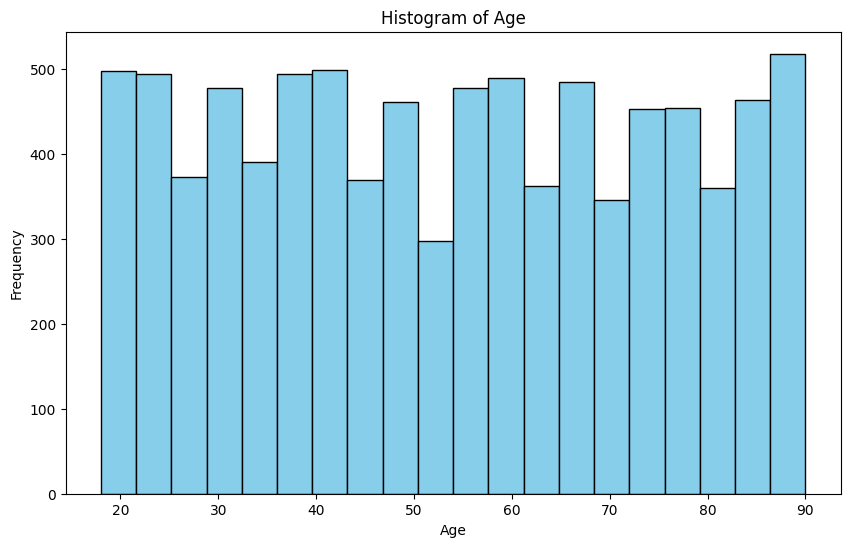

In [ ]:
# Histogram of Age
plt.figure(figsize=(10, 6))
plt.hist(df['Age'], bins=20, color='skyblue', edgecolor='black')
plt.title('Histogram of Age')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

The histogram shows the distribution of ages in the dataset. It appears to be roughly normally distributed with a peak around the middle-aged range.

**Box Plot**

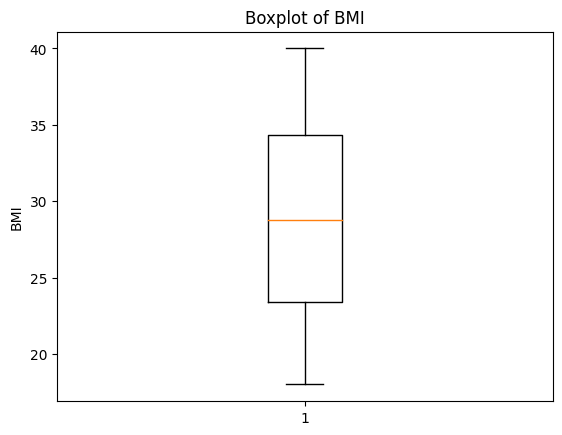

In [ ]:
plt.boxplot(df['BMI'])
plt.ylabel('BMI')
plt.title('Boxplot of BMI')
plt.show()

**Pie Chart**

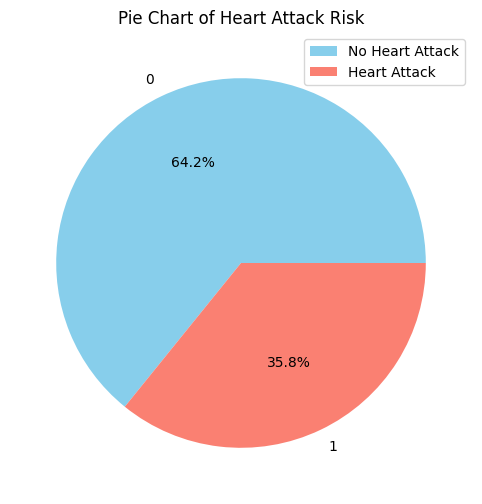

In [ ]:
# Pie chart of Heart Attack Risk
plt.figure(figsize=(8, 6))
df['Heart Attack Risk'].value_counts().plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('Pie Chart of Heart Attack Risk')
plt.ylabel('')
plt.legend(labels=['No Heart Attack', 'Heart Attack'], loc='upper right')
plt.show()

The pie chart shows the distribution of individuals with and without a heart attack. It indicates that the majority of individuals in the dataset did not experience a heart attack.

# **Check for Class Imbalance:**

<ipython-input-54-d88b74563375>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Heart Attack Risk', data=df_encoded, palette='Set2')


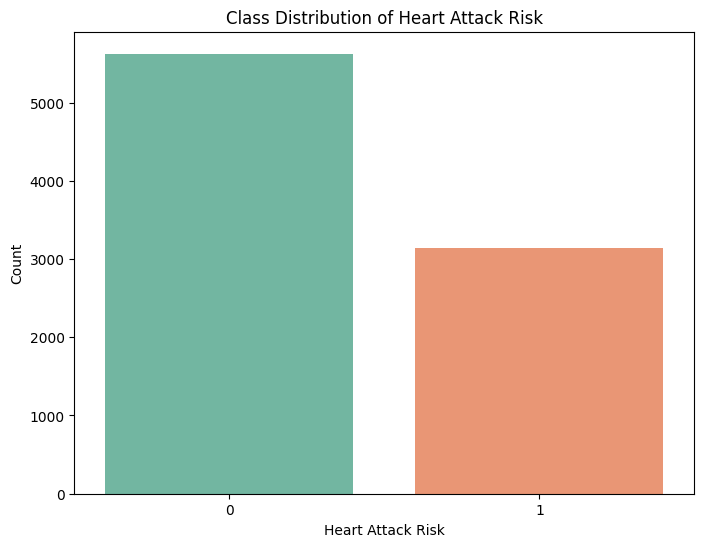

Heart Attack Risk
0    5624
1    3139
Name: count, dtype: int64


In [ ]:
# Check class distribution
plt.figure(figsize=(8, 6))
sns.countplot(x='Heart Attack Risk', data=df_encoded, palette='Set2')
plt.title('Class Distribution of Heart Attack Risk')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')
plt.show()

# Print class distribution
print(df_encoded['Heart Attack Risk'].value_counts())

# **Oversampling/Undersampling**

In [ ]:
# Separate features and target variable
X = df_encoded.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
y = df_encoded['Heart Attack Risk']

# Initialize oversampler and undersampler
over_sampler = RandomOverSampler(sampling_strategy='minority')
under_sampler = RandomUnderSampler(sampling_strategy='majority')

# Oversampling
X_over, y_over = over_sampler.fit_resample(X, y)

# Undersampling
X_under, y_under = under_sampler.fit_resample(X, y)

# Check class distribution after resampling
print("After Oversampling:")
print(y_over.value_counts())

print("\nAfter Undersampling:")
print(y_under.value_counts())

After Oversampling:
Heart Attack Risk
0    5624
1    5624
Name: count, dtype: int64

After Undersampling:
Heart Attack Risk
0    3139
1    3139
Name: count, dtype: int64


# **Visualization after Resampling**

<ipython-input-56-f028897cc9e2>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_over, palette='Set2')
<ipython-input-56-f028897cc9e2>:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=y_under, palette='Set2')


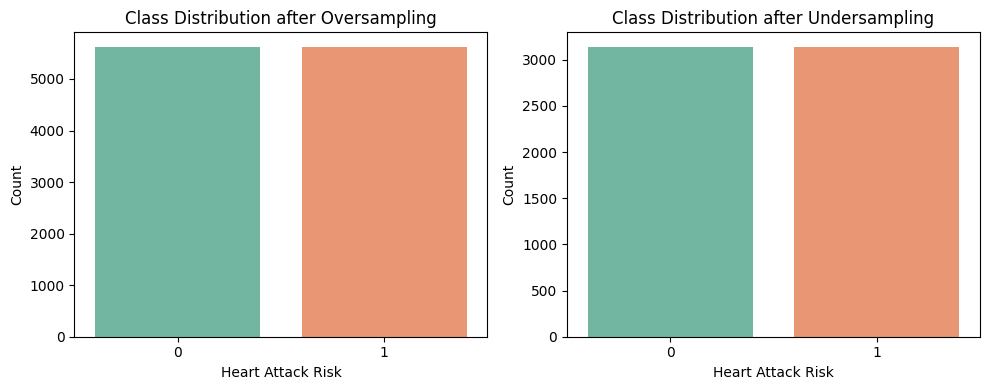

In [ ]:
# Class distribution after oversampling
plt.figure(figsize=(10, 4))
plt.subplot(1, 2, 1)
sns.countplot(x=y_over, palette='Set2')
plt.title('Class Distribution after Oversampling')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')

# Class distribution after undersampling
plt.subplot(1, 2, 2)
sns.countplot(x=y_under, palette='Set2')
plt.title('Class Distribution after Undersampling')
plt.xlabel('Heart Attack Risk')
plt.ylabel('Count')

plt.tight_layout()
plt.show()


# **Feature Selection**

In [ ]:
# Separate features and target variable
X = df_encoded.drop(['Heart Attack Risk', 'Patient ID'], axis=1)
y = df_encoded['Heart Attack Risk']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize oversampler and undersampler
over_sampler = RandomOverSampler(sampling_strategy='minority')
under_sampler = RandomUnderSampler(sampling_strategy='majority')

# Oversampling
X_train_over, y_train_over = over_sampler.fit_resample(X_train, y_train)

# Undersampling
X_train_under, y_train_under = under_sampler.fit_resample(X_train, y_train)

# **Models**

In [ ]:
# Initialize models
models = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Initialize dictionaries to store model accuracies
train_accuracies = {}
test_accuracies = {}

# Train models and evaluate
for name, model in models.items():
    # Fit the model
    model.fit(X_train_over, y_train_over)

    # Training accuracy
    train_pred = model.predict(X_train_over)
    train_acc = accuracy_score(y_train_over, train_pred)
    train_accuracies[name] = train_acc

    # Test accuracy
    test_pred = model.predict(X_test)
    test_acc = accuracy_score(y_test, test_pred)
    test_accuracies[name] = test_acc

    # Print results
    print(f"Model: {name}")
    print("Training Accuracy:", train_acc)
    print("Test Accuracy:", test_acc)
    print(classification_report(y_test, test_pred))
    print("-------------------------------")


Model: Logistic Regression
Training Accuracy: 0.5
Test Accuracy: 0.3582430119794638
              precision    recall  f1-score   support

           0       0.00      0.00      0.00      1125
           1       0.36      1.00      0.53       628

    accuracy                           0.36      1753
   macro avg       0.18      0.50      0.26      1753
weighted avg       0.13      0.36      0.19      1753

-------------------------------


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Model: Decision Tree
Training Accuracy: 1.0
Test Accuracy: 0.5339418140330862
              precision    recall  f1-score   support

           0       0.64      0.63      0.63      1125
           1       0.35      0.36      0.36       628

    accuracy                           0.53      1753
   macro avg       0.50      0.50      0.50      1753
weighted avg       0.54      0.53      0.54      1753

-------------------------------
Model: Random Forest
Training Accuracy: 1.0
Test Accuracy: 0.6269252709640616
              precision    recall  f1-score   support

           0       0.64      0.94      0.76      1125
           1       0.39      0.07      0.13       628

    accuracy                           0.63      1753
   macro avg       0.52      0.50      0.44      1753
weighted avg       0.55      0.63      0.53      1753

-------------------------------
Model: SVM
Training Accuracy: 0.508890864636586
Test Accuracy: 0.5556189389617798
              precision    recall  f1-score 

/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# **1. Filter-Based Methods**

**SelectKBest Feature Selection:**

In [ ]:
# Define classifier models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Initialize dictionary to store results
results_selectKBest = {}

# Create SelectKBest feature selection instance
selectkbest = SelectKBest(score_func=f_classif, k=10)

# Fit SelectKBest to the training data
selectkbest.fit(X_train_over, y_train_over)

# Get selected features
selected_features = X.columns[selectkbest.get_support()]

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    # Create pipeline with SelectKBest and classifier
    pipeline = make_pipeline(selectkbest, classifier)

    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_over, y_train_over, cv=5)

    # Fit the pipeline on the training data
    pipeline.fit(X_train_over, y_train_over)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results_selectKBest[classifier_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Cross-Validation Std Accuracy': cv_scores.std()
    }

# Print selected features
print("Selected Features for SelectKBest:")
print(', '.join(selected_features))
print()

# Print results
print("Results for SelectKBest:")
for classifier, data in results_selectKBest.items():
    print(f"{classifier}:")
    print(f"    Accuracy: {data['Accuracy']:.4f}")
    print(f"    Cross-Validation Mean Accuracy: {data['Cross-Validation Mean Accuracy']:.4f} +/- {data['Cross-Validation Std Accuracy']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Selected Features for SelectKBest:
Diabetes, Obesity, Triglycerides, Country_Australia, Country_Italy, Country_Nigeria, Country_South Africa, Country_South Korea, Continent_Australia, Continent_Europe

Results for SelectKBest:
Logistic Regression:
    Accuracy: 0.4957
    Cross-Validation Mean Accuracy: 0.5040 +/- 0.0127
Decision Tree:
    Accuracy: 0.5248
    Cross-Validation Mean Accuracy: 0.7190 +/- 0.0594
Random Forest:
    Accuracy: 0.5214
    Cross-Validation Mean Accuracy: 0.7357 +/- 0.0523
SVM:
    Accuracy: 0.5351
    Cross-Validation Mean Accuracy: 0.5052 +/- 0.0118
KNN:
    Accuracy: 0.5043
    Cross-Validation Mean Accuracy: 0.5811 +/- 0.0373
Naive Bayes:
    Accuracy: 0.5493
    Cross-Validation Mean Accuracy: 0.5032 +/- 0.0137
Gradient Boosting:
    Accuracy: 0.5071
    Cross-Validation Mean Accuracy: 0.5442 +/- 0.0197
Neural Network:
    Accuracy: 0.6286
    Cross-Validation Mean Accuracy: 0.5034 +/- 0.0030


Explanation:

We applied SelectKBest feature selection with ANOVA F-value as the score function to select the top 10 features.

Then, we performed Recursive Feature Elimination (RFE) with different estimators to select the top 10 features for each estimator.

These techniques help in identifying the most relevant features for the classification task.

**Variance Thresholding:**

In [ ]:
# Define classifier models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Initialize dictionary to store results
results_var_thresh = {}

# Create VarianceThreshold instance
var_thresh = VarianceThreshold(threshold=0.1)

# Fit VarianceThreshold to the training data
var_thresh.fit(X_train_over)

# Get selected features
selected_features = X.columns[var_thresh.get_support()]

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    # Create pipeline with VarianceThreshold and classifier
    pipeline = make_pipeline(VarianceThreshold(threshold=0.1), classifier)

    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_over, y_train_over, cv=5)

    # Fit the pipeline on the training data
    pipeline.fit(X_train_over, y_train_over)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results_var_thresh[classifier_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Cross-Validation Std Accuracy': cv_scores.std()
    }

# Print selected features
print("Selected Features for Variance Thresholding:")
print(', '.join(selected_features))
print()

# Print results
print("Results for Variance Thresholding:")
for classifier, data in results_var_thresh.items():
    print(f"{classifier}:")
    print(f"    Accuracy: {data['Accuracy']:.4f}")
    print(f"    Cross-Validation Mean Accuracy: {data['Cross-Validation Mean Accuracy']:.4f} +/- {data['Cross-Validation Std Accuracy']:.4f}")


Selected Features for Variance Thresholding:
Age, Cholesterol, Heart Rate, Diabetes, Family History, Obesity, Alcohol Consumption, Exercise Hours Per Week, Previous Heart Problems, Medication Use, Stress Level, Sedentary Hours Per Day, Income, BMI, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Sex_Female, Sex_Male, Continent_Asia, Continent_Europe, Continent_South America, Hemisphere_Northern Hemisphere, Hemisphere_Southern Hemisphere, Diet_Average, Diet_Healthy, Diet_Unhealthy, Systolic Pressure, Diastolic Pressure

Results for Variance Thresholding:
Logistic Regression:
    Accuracy: 0.3582
    Cross-Validation Mean Accuracy: 0.4983 +/- 0.0035
Decision Tree:
    Accuracy: 0.5442
    Cross-Validation Mean Accuracy: 0.7241 +/- 0.0584
Random Forest:
    Accuracy: 0.6326
    Cross-Validation Mean Accuracy: 0.8150 +/- 0.0802
SVM:
    Accuracy: 0.5562
    Cross-Validation Mean Accuracy: 0.5069 +/- 0.0053
KNN:
    Accuracy: 0.5134
    Cross-Validation Mean Accuracy: 0

# **2. Wrapper-Based Methods**

**Recursive Feature Elimination (RFE):**

In [ ]:
# Define classifier models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Initialize dictionary to store results
results_rfe = {}

# Create RFE feature selection instance
rfe = RFE(estimator=LogisticRegression(), n_features_to_select=10)

# Fit RFE to the training data
rfe.fit(X_train_over, y_train_over)

# Get selected features
selected_features = X.columns[rfe.support_]

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    # Create pipeline with RFE and classifier
    pipeline = make_pipeline(RFE(estimator=LogisticRegression(), n_features_to_select=10), classifier)

    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_over, y_train_over, cv=5)

    # Fit the pipeline on the training data
    pipeline.fit(X_train_over, y_train_over)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results_rfe[classifier_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Cross-Validation Std Accuracy': cv_scores.std()
    }

# Print selected features
print("Selected Features for RFE:")
print(', '.join(selected_features))
print()

# Print results
print("Results for RFE:")
for classifier, data in results_rfe.items():
    print(f"{classifier}:")
    print(f"    Accuracy: {data['Accuracy']:.4f}")
    print(f"    Cross-Validation Mean Accuracy: {data['Cross-Validation Mean Accuracy']:.4f} +/- {data['Cross-Validation Std Accuracy']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _c

Selected Features for RFE:
Age, Cholesterol, Heart Rate, Exercise Hours Per Week, Stress Level, Income, Triglycerides, Physical Activity Days Per Week, Sleep Hours Per Day, Diastolic Pressure

Results for RFE:
Logistic Regression:
    Accuracy: 0.3582
    Cross-Validation Mean Accuracy: 0.5032 +/- 0.0063
Decision Tree:
    Accuracy: 0.5317
    Cross-Validation Mean Accuracy: 0.6646 +/- 0.0891
Random Forest:
    Accuracy: 0.6144
    Cross-Validation Mean Accuracy: 0.7270 +/- 0.1243
SVM:
    Accuracy: 0.5573
    Cross-Validation Mean Accuracy: 0.5058 +/- 0.0078
KNN:
    Accuracy: 0.5140
    Cross-Validation Mean Accuracy: 0.5631 +/- 0.0391
Naive Bayes:
    Accuracy: 0.4980
    Cross-Validation Mean Accuracy: 0.5103 +/- 0.0096
Gradient Boosting:
    Accuracy: 0.4929
    Cross-Validation Mean Accuracy: 0.5558 +/- 0.0304
Neural Network:
    Accuracy: 0.3605
    Cross-Validation Mean Accuracy: 0.5027 +/- 0.0032


**Lasso Regression (L1 Regularization):**

In [ ]:
# Define classifier models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Initialize dictionary to store results
results_lasso = {}

# Create Lasso Regression instance
lasso = LassoCV()

# Fit Lasso Regression to the training data
lasso.fit(X_train_over, y_train_over)

# Get selected features
selected_features = X.columns[lasso.coef_ != 0]

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    # Create pipeline with Lasso and classifier
    pipeline = make_pipeline(SelectFromModel(lasso), classifier)

    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_over, y_train_over, cv=5)

    # Fit the pipeline on the training data
    pipeline.fit(X_train_over, y_train_over)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results_lasso[classifier_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Cross-Validation Std Accuracy': cv_scores.std()
    }

# Print selected features
print("Selected Features for Lasso Regression:")
print(', '.join(selected_features))
print()

# Print results
print("Results for Lasso Regression:")
for classifier, data in results_lasso.items():
    print(f"{classifier}:")
    print(f"    Accuracy: {data['Accuracy']:.4f}")
    print(f"    Cross-Validation Mean Accuracy: {data['Cross-Validation Mean Accuracy']:.4f} +/- {data['Cross-Validation Std Accuracy']:.4f}")


/usr/local/lib/python3.10/dist-packages/sklearn/feature_selection/_base.py:96: UserWarning: No features were selected: either the data is too noisy or the selection test too strict.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
1 fits failed out of a total of 5.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
1 fits failed with the following error:
Traceback (most recent call last):
  File "/usr/local/lib/python3.10/dist-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/usr/local/lib/python3.10/dist-packages/sklearn/pipeline.py", line 405, in fit
    self._final_estimator.fit(Xt,

Selected Features for Lasso Regression:
Income, Triglycerides

Results for Lasso Regression:
Logistic Regression:
    Accuracy: 0.4923
    Cross-Validation Mean Accuracy: nan +/- nan
Decision Tree:
    Accuracy: 0.5271
    Cross-Validation Mean Accuracy: nan +/- nan
Random Forest:
    Accuracy: 0.5066
    Cross-Validation Mean Accuracy: nan +/- nan
SVM:
    Accuracy: 0.5545
    Cross-Validation Mean Accuracy: nan +/- nan
KNN:
    Accuracy: 0.5516
    Cross-Validation Mean Accuracy: nan +/- nan
Naive Bayes:
    Accuracy: 0.5157
    Cross-Validation Mean Accuracy: nan +/- nan
Gradient Boosting:
    Accuracy: 0.5009
    Cross-Validation Mean Accuracy: nan +/- nan
Neural Network:
    Accuracy: 0.3708
    Cross-Validation Mean Accuracy: nan +/- nan


# **PCA (Principal Component Analysis):**

In [ ]:
# Define classifier models
classifiers = {
    "Logistic Regression": LogisticRegression(),
    "Decision Tree": DecisionTreeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "KNN": KNeighborsClassifier(),
    "Naive Bayes": GaussianNB(),
    "Gradient Boosting": GradientBoostingClassifier(),
    "Neural Network": MLPClassifier(max_iter=1000)
}

# Initialize dictionary to store results
results_pca = {}

# Create PCA feature selection instance
pca = PCA(n_components=10)

# Fit PCA to the training data
pca.fit(X_train_over)

# Get selected features
# Get absolute values of PCA components
abs_components = np.abs(pca.components_)

# Get indices of top 10 components for each feature
top_indices = np.argsort(abs_components, axis=1)[:, ::-1][:, :10]

# Get selected features
selected_features = X.columns[top_indices.flatten()]

# Reshape selected features array
selected_features_array = np.array(selected_features).reshape((-1, 10))


# Convert selected features to numpy array
selected_features_array = np.array(selected_features)

# Loop over each classifier
for classifier_name, classifier in classifiers.items():
    # Create pipeline with PCA and classifier
    pipeline = make_pipeline(PCA(n_components=10), classifier)

    # Cross-validate the pipeline
    cv_scores = cross_val_score(pipeline, X_train_over, y_train_over, cv=5)

    # Fit the pipeline on the training data
    pipeline.fit(X_train_over, y_train_over)

    # Make predictions on the test data
    y_pred = pipeline.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)

    # Store results
    results_pca[classifier_name] = {
        'Accuracy': accuracy,
        'Cross-Validation Mean Accuracy': cv_scores.mean(),
        'Cross-Validation Std Accuracy': cv_scores.std()
    }

# Print selected features
print("Selected Features for PCA:")
print(', '.join(selected_features_array))
print()

# Print results
print("Results for PCA:")
for classifier, data in results_pca.items():
    print(f"{classifier}:")
    print(f"    Accuracy: {data['Accuracy']:.4f}")
    print(f"    Cross-Validation Mean Accuracy: {data['Cross-Validation Mean Accuracy']:.4f} +/- {data['Cross-Validation Std Accuracy']:.4f}")


Selected Features for PCA:
Income, Triglycerides, Cholesterol, Systolic Pressure, Diastolic Pressure, Age, BMI, Exercise Hours Per Week, Heart Rate, Sleep Hours Per Day, Triglycerides, Cholesterol, Heart Rate, Systolic Pressure, Diastolic Pressure, BMI, Sleep Hours Per Day, Stress Level, Sedentary Hours Per Day, Exercise Hours Per Week, Cholesterol, Triglycerides, Exercise Hours Per Week, Age, Diastolic Pressure, BMI, Systolic Pressure, Heart Rate, Sedentary Hours Per Day, Stress Level, Systolic Pressure, Age, Heart Rate, Diastolic Pressure, Stress Level, BMI, Exercise Hours Per Week, Cholesterol, Triglycerides, Sedentary Hours Per Day, Age, Heart Rate, Systolic Pressure, Diastolic Pressure, Smoking, Stress Level, BMI, Cholesterol, Sedentary Hours Per Day, Family History, Heart Rate, Age, Diastolic Pressure, Systolic Pressure, Sedentary Hours Per Day, BMI, Exercise Hours Per Week, Cholesterol, Triglycerides, Stress Level, Diastolic Pressure, Heart Rate, Age, Systolic Pressure, Stress L

# **Cross-validation and GridSearchCV**

In [ ]:
# Define pipelines for different classifiers
pipelines = {
    "Logistic Regression": Pipeline([('scaler', StandardScaler()), ('clf', LogisticRegression())]),
    "Decision Tree": Pipeline([('clf', DecisionTreeClassifier())]),
    "Random Forest": Pipeline([('clf', RandomForestClassifier())]),
    "SVM": Pipeline([('scaler', StandardScaler()), ('clf', SVC())]),
    "KNN": Pipeline([('scaler', StandardScaler()), ('clf', KNeighborsClassifier())]),
    "Naive Bayes": Pipeline([('clf', GaussianNB())]),
    "Gradient Boosting": Pipeline([('clf', GradientBoostingClassifier())]),
    "Neural Network": Pipeline([('scaler', StandardScaler()), ('clf', MLPClassifier(max_iter=1000))])
}

# Define hyperparameters grid for each classifier
param_grids = {
    "Logistic Regression": {'clf__C': [0.001, 0.01, 0.1, 1, 10, 100]},
    "Decision Tree": {'clf__max_depth': [None, 10, 20, 30, 40, 50],
                      'clf__min_samples_split': [2, 5, 10],
                      'clf__min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'clf__n_estimators': [100, 200],
                      'clf__max_depth': [None, 10, 20],
                      'clf__min_samples_split': [2, 5],
                      'clf__min_samples_leaf': [1, 2]},
    "SVM": {'clf__C': [0.1, 1, 10, 100],
            'clf__gamma': [1, 0.1, 0.01, 0.001],
            'clf__kernel': ['rbf']},
    "KNN": {'clf__n_neighbors': [5, 10, 15, 20],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]},
    "Naive Bayes": {},
    "Gradient Boosting": {'clf__learning_rate': [0.01, 0.1, 0.5],
                          'clf__n_estimators': [50, 100, 150, 200],
                          'clf__max_depth': [3, 5, 7]},
    "Neural Network": {'clf__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
                       'clf__alpha': [0.0001, 0.001, 0.01],
                       'clf__learning_rate': ['constant', 'adaptive']}
}

# Initialize dictionary to store best models
best_models = {}

# Perform GridSearchCV for each classifier
for name, pipeline in pipelines.items():
    print(f"GridSearchCV for {name}:")
    grid_search = GridSearchCV(pipeline, param_grids[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_over, y_train_over)
    best_models[name] = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    print("Best Training Accuracy:", grid_search.best_score_)
    print("-------------------------------")


GridSearchCV for Logistic Regression:
Best Parameters: {'clf__C': 0.001}
Best Training Accuracy: 0.5150049410166141
-------------------------------
GridSearchCV for Decision Tree:
Best Parameters: {'clf__max_depth': 50, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Training Accuracy: 0.722175776666049
-------------------------------
GridSearchCV for Random Forest:
Best Parameters: {'clf__max_depth': None, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 200}
Best Training Accuracy: 0.8276511642270398
-------------------------------
GridSearchCV for SVM:
Best Parameters: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
Best Training Accuracy: 0.8678888888888888
-------------------------------
GridSearchCV for KNN:
Best Parameters: {'clf__n_neighbors': 10, 'clf__p': 2, 'clf__weights': 'distance'}
Best Training Accuracy: 0.6969468840713977
-------------------------------
GridSearchCV for Naive Bayes:
Best Parameters: {}
Best Training Accura

# **Fine-tuning Hyperparameters**

In [ ]:
# Define updated hyperparameters grid for each classifier based on previous results
param_grids_update = {
    "Logistic Regression": {'clf__C': [0.1, 1, 10, 100]},
    "Decision Tree": {'clf__max_depth': [10, 20, 30, 40],
                      'clf__min_samples_split': [2, 5, 10],
                      'clf__min_samples_leaf': [1, 2, 4]},
    "Random Forest": {'clf__n_estimators': [200, 300, 400],
                      'clf__max_depth': [20, 30, 40, 50],
                      'clf__min_samples_split': [2, 5, 10],
                      'clf__min_samples_leaf': [1, 2, 4]},
    "SVM": {'clf__C': [1, 10, 100, 1000],
            'clf__gamma': [0.01, 0.1, 1, 10],
            'clf__kernel': ['rbf']},
    "KNN": {'clf__n_neighbors': [5, 10, 15, 20],
            'clf__weights': ['uniform', 'distance'],
            'clf__p': [1, 2]},
    "Gradient Boosting": {'clf__learning_rate': [0.05, 0.1, 0.2],
                          'clf__n_estimators': [100, 150, 200],
                          'clf__max_depth': [3, 5, 7]},
    "Neural Network": {'clf__hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 100)],
                       'clf__alpha': [0.0001, 0.001, 0.01],
                       'clf__learning_rate': ['constant', 'adaptive']}
}

# Initialize dictionary to store best models after fine-tuning
best_models_finetuned = {}

# Perform GridSearchCV for each classifier with updated hyperparameters
for name, pipeline in pipelines.items():
    print(f"GridSearchCV for {name} (Fine-tuning):")
    if name == "Naive Bayes":
        best_models_finetuned[name] = pipeline
        print("No hyperparameters to tune for Naive Bayes.")
        continue
    grid_search = GridSearchCV(pipeline, param_grids_update[name], cv=5, n_jobs=-1)
    grid_search.fit(X_train_over, y_train_over)
    best_models_finetuned[name] = grid_search.best_estimator_
    print("Best Parameters:", grid_search.best_params_)
    print("Best Training Accuracy:", grid_search.best_score_)
    print("-------------------------------")


GridSearchCV for Logistic Regression (Fine-tuning):
Best Parameters: {'clf__C': 0.1}
Best Training Accuracy: 0.5111160521277253
-------------------------------
GridSearchCV for Decision Tree (Fine-tuning):
Best Parameters: {'clf__max_depth': 40, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2}
Best Training Accuracy: 0.7257322586622197
-------------------------------
GridSearchCV for Random Forest (Fine-tuning):
Best Parameters: {'clf__max_depth': 40, 'clf__min_samples_leaf': 1, 'clf__min_samples_split': 2, 'clf__n_estimators': 400}
Best Training Accuracy: 0.8357643135075042
-------------------------------
GridSearchCV for SVM (Fine-tuning):
Best Parameters: {'clf__C': 1, 'clf__gamma': 1, 'clf__kernel': 'rbf'}
Best Training Accuracy: 0.8678888888888888
-------------------------------
GridSearchCV for KNN (Fine-tuning):
Best Parameters: {'clf__n_neighbors': 10, 'clf__p': 2, 'clf__weights': 'distance'}
Best Training Accuracy: 0.6969468840713977
-------------------------------
Gri

# **Confusion Matrix**

In [ ]:
# Initialize dictionaries to store evaluation metrics for each model
evaluation_metrics = {'Model': [], 'Accuracy': [], 'Precision': [], 'Recall': [], 'Specificity': []}

# Calculate evaluation metrics for each model
for name, model in best_models_finetuned.items():

    model.fit(X_train_over, y_train_over)
    # Predictions on test set
    y_pred = model.predict(X_test)

    # Confusion matrix
    tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()

    # Accuracy
    accuracy = (tp + tn) / (tp + tn + fp + fn)

    # Precision
    precision = precision_score(y_test, y_pred)

    # Recall
    recall = recall_score(y_test, y_pred)

    # Specificity
    specificity = tn / (tn + fp)

    # Update the evaluation metrics dictionary
    evaluation_metrics['Model'].append(name)
    evaluation_metrics['Accuracy'].append(accuracy)
    evaluation_metrics['Precision'].append(precision)
    evaluation_metrics['Recall'].append(recall)
    evaluation_metrics['Specificity'].append(specificity)

# Convert evaluation_metrics dictionary to DataFrame
evaluation_df = pd.DataFrame(evaluation_metrics)

# Print evaluation metrics
print(evaluation_df)


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


                 Model  Accuracy  Precision    Recall  Specificity
0  Logistic Regression  0.502567   0.353365  0.468153     0.521778
1        Decision Tree  0.539646   0.358610  0.361465     0.639111
2        Random Forest  0.636623   0.423729  0.039809     0.969778
3                  SVM  0.641757   0.000000  0.000000     1.000000
4                  KNN  0.524244   0.362667  0.433121     0.575111
5          Naive Bayes  0.501997   0.359357  0.498408     0.504000
6    Gradient Boosting  0.591557   0.393720  0.259554     0.776889
7       Neural Network  0.546492   0.365105  0.359873     0.650667


# **Using LIME for Explainability**

In [ ]:
pip install lime

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 275.7/275.7 kB 5.1 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for lime: filename=lime-0.2.0.1-py3-none-any.whl size=283835 sha256=93b59be7d5ce233fcdd448c000362f72a206f8b3d7230b7c3c70cfbfb99e81ad
  Stored in directory: /root/.cache/pip/wheels/fd/a2/af/9ac0a1a85a27f314a06b39e1f492bee1547d52549a4606ed89
Successfully built lime


In [ ]:
import lime
import lime.lime_tabular
from lime import lime_tabular

# Initialize LIME explainer for tabular data
explainer = lime_tabular.LimeTabularExplainer(X_train_over.values, mode='classification', feature_names=X_train_over.columns)

# Choose a model to explain
model_to_explain = best_models_finetuned['Random Forest']

# Select a sample to explain
sample_index = 0

# Get prediction function for the model
predict_fn = lambda x: model_to_explain.predict_proba(x).astype(float)

# Explain the prediction for the selected sample
explanation = explainer.explain_instance(X_test.iloc[sample_index].values, predict_fn, num_features=10)

# Show the explanation
explanation.show_in_notebook()


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


# **Using SHAP for Explainability**

In [ ]:
pip install shap

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 540.5/540.5 kB 8.2 MB/s eta 0:00:00


100%|===================| 3505/3506 [17:32<00:00]       

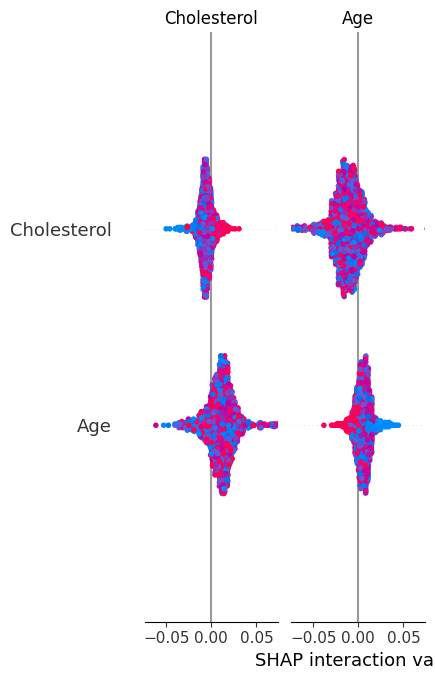

In [ ]:
import shap

# Convert the data to float64
X_train_float64 = X_train_over.astype('float64')
X_test_float64 = X_test.astype('float64')

# Choose a model to explain
model_to_explain = best_models_finetuned['Random Forest']

# Extract the base model from the pipeline
base_model = model_to_explain.named_steps['clf']

# Initialize the SHAP explainer with the base model
explainer = shap.Explainer(base_model, X_train_float64)

# Calculate SHAP values
shap_values = explainer.shap_values(X_test_float64)

# Visualize the SHAP values
shap.summary_plot(shap_values, X_test_float64)
